In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
sumPath = '/Users/zhengj10/Desktop/GENIE/Manuscript/Voltron 2 paper/Voltron 2 paper_v10'

In [5]:
df_bleaching = pd.read_excel(sumPath+'/bleaching_data 8.03.47 PM 8.03.47 PM 8.03.47 PM 8.03.47 PM 8.03.47 PM 8.03.47 PM 8.03.47 PM 8.03.47 PM 8.03.47 PM 8.03.47 PM.xlsx')

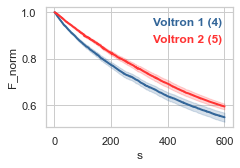

In [6]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import seaborn as sns
from matplotlib import font_manager



fig = plt.figure(figsize=[3.5,2.5])

sns.set()
sns.set_style(style='whitegrid')

ax = plt.subplot(111)

labels_p = {
    'Voltron_1(4)':'Voltron (4)',
    'Voltron_2(5)':'Voltron 2 (5)'
}

color = {
    'Voltron_1(4)':'#336699',
    'Voltron_2(5)':'#FF3333'
}



x = np.arange(1,601)
v1_mean = np.array(df_bleaching['Voltron_1(4)'].to_list())
v1_sem = np.array(df_bleaching.V1_sem.to_list())

v2_mean = np.array(df_bleaching['Voltron_2(5)'].to_list())
v2_sem = np.array(df_bleaching['V-A122D_sem'].to_list())

ax.plot(x, v1_mean, lw=2, label='Voltron 1 (4)',color='#336699')
ax.fill_between(x,v1_mean-v1_sem,v1_mean+v1_sem,alpha=0.2,color='#336699')

ax.plot(x, v2_mean, lw=2, label='Voltron 2 (5)',color='#FF3333')
ax.fill_between(x,v2_mean-v2_sem,v2_mean+v2_sem,alpha=0.2,color='#FF3333')

font = font_manager.FontProperties(weight='bold',style='normal')
leg = ax.legend(handlelength=0,handletextpad = -0.21,markerscale=0,frameon=False,prop=font)

for item in leg.legendHandles: # remove line marker in legend
    item.set_visible(False)

for artist, text in zip(leg.legendHandles, leg.get_texts()): # set text the same color as line
    col = artist.get_color()
    if isinstance(col, np.ndarray):
        col = col[0]
    text.set_color(col)
    
    
ax.set_xlabel('s')
ax.set_ylabel('F_norm')


plt.tight_layout()


# plt.setp(ax, xticks=x)
# plt.text(-10, 0.2, '*', color='k',size=14)
# plt.text(-2, -28, 'Voltron V74G', color='gray', size=10)

# fig.savefig(sumPath+'/bleaching.pdf',format='pdf')
plt.show()


In [18]:
from scipy.optimize import curve_fit
p,_ = curve_fit(lambda x,a,b,c:a*np.exp(b*x)+c,x,v2_mean,p0=[1,-0.3,0.1])

In [19]:
p
a = p[0]
b = p[1]
c = p[2]

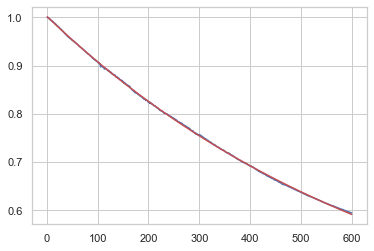

In [21]:
plt.plot(x,v2_mean)
plt.plot(x,a*np.exp(b*x)+c,color='r')

In [17]:
p

array([ 0.59111548, -0.00226154,  0.39884587])

In [22]:
p

array([ 0.72384387, -0.00139719,  0.27835444])

In [7]:
from scipy.stats import mannwhitneyu

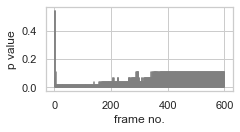

In [9]:

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=[3.5,2])
for i,r in df_bleaching.iterrows():
    if i == 0:
        continue
    A = [r['V1-normalized'],r['V2-normalized'],r['V3-normalized'],r['V4-normalized']]
    B = [r['V-122D1-normalized'],r['V-122D2-normalized'],r['V-122D3-normalized'],
        r['V-122D4-normalized'],r['V-122D4-normalized.1']]
    stat, p = mannwhitneyu(A, B, alternative='two-sided')
    plt.plot([i+1,i+1],[0,p],color='gray')
    plt.ylabel('p value')
    plt.xlabel('frame no.')
plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/bleaching_p_val.pdf',format='pdf')
plt.show()


In [16]:
v2_sem[-1]

0.012404240168387608

In [17]:
p

0.11134688653314041